1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

C:\Users\laura\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\laura\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\laura\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


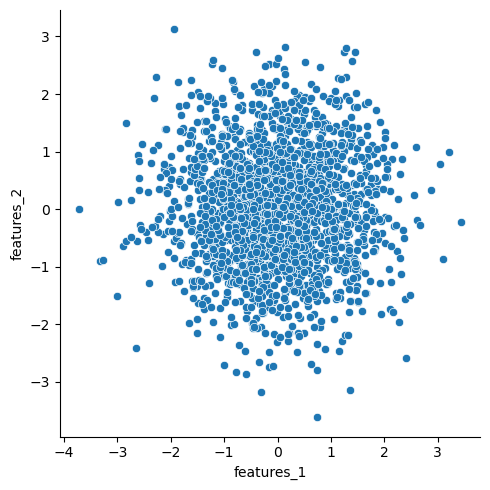

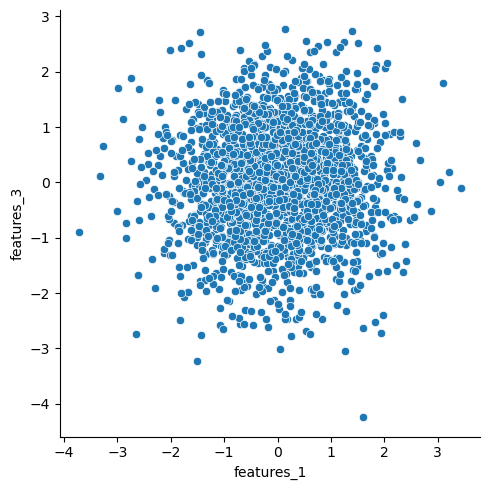

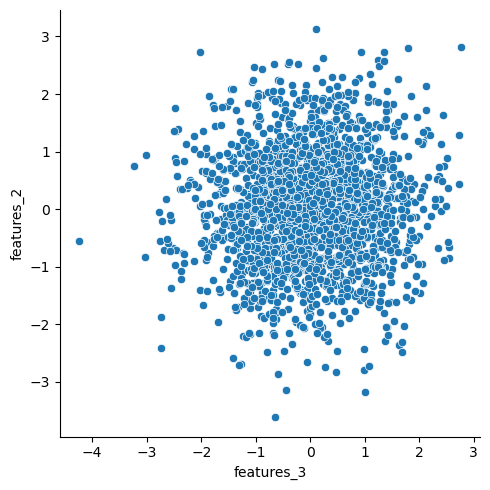

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import trapz
from scipy.stats import norm

df = pd.read_csv('data/regression_generated.csv')

sns.relplot(x="features_1", y="features_2", data=df)
sns.relplot(x="features_1", y="features_3", data=df)
sns.relplot(x="features_3", y="features_2", data=df)


2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

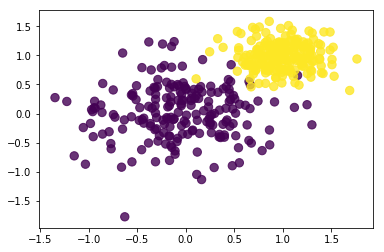

In [2]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

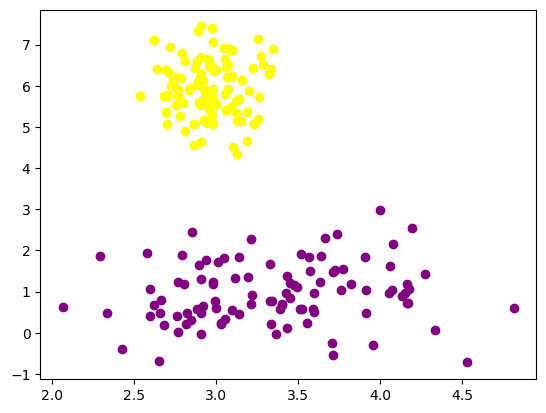

In [3]:
def generate_2d_dataset(mean_c1, std_dev_c1, mean_c2, std_dev_c2):
    c1 = np.random.normal(mean_c1, std_dev_c1,(100,))
    c2 = np.random.normal(mean_c2, std_dev_c2,(100,))
    
    dataset = np.column_stack((c1, c2))
    df = pd.DataFrame(dataset, columns = ['a','b'])
    return df
s1= generate_2d_dataset(3, 0.2, 6, 0.6)
s2= generate_2d_dataset(3.4, 0.6, 1, 0.7)
plt.scatter(s1['a'], s1['b'], color='yellow')
plt.scatter(s2['a'], s2['b'], color='purple')
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

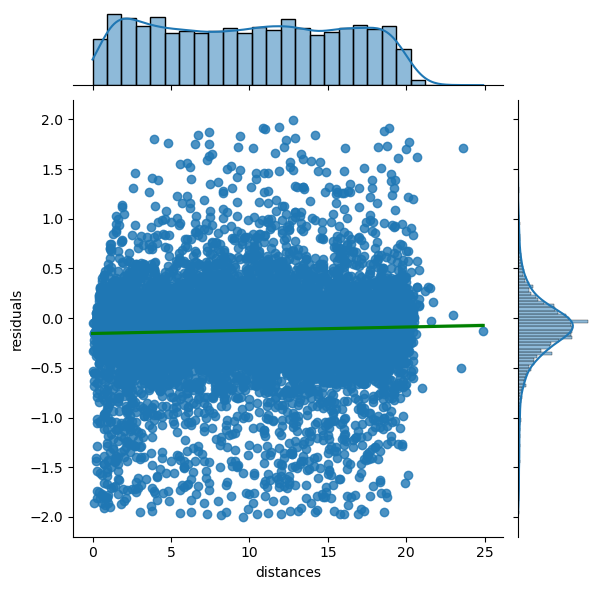

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        3., 7., 6., 0., 0., 0., 0., 1.]),
 array([-6.9047619 , -6.56017143, -6.21558095, -5.87099048, -5.5264    ,
        -5.18180952, -4.83721905, -4.49262857, -4.1480381 , -3.80344762,
        -3.45885714, -3.11426667, -2.76967619, -2.42508571, -2.08049524,
        -1.73590476, -1.39131429, -1.04672381, -0.70213333, -0.35754286,
        -0.01295238,  0.3316381 ,  0.67622857,  1.02081905,  1.36540952,
         1.71      ]),
 <BarContainer object of 25 artists>)

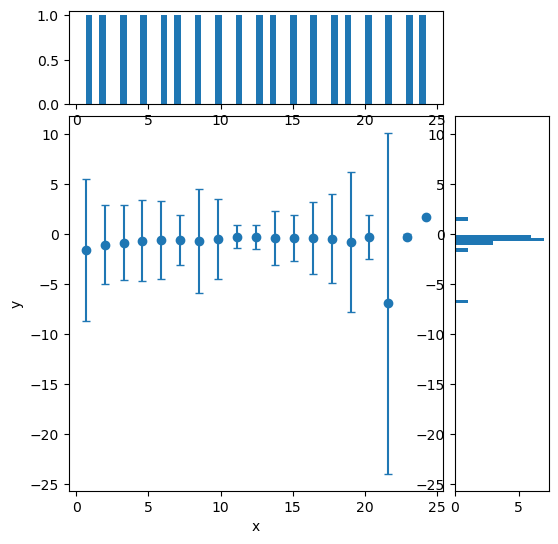

In [4]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
p= open("data/residuals_261.pkl","rb")
data = pd.read_pickle(p)
d= dict(enumerate(data.flatten()))
#print((d))
df = pd.DataFrame(d[0], columns=['residuals', 'distances'])
#print(df)

df_n= df[abs(df['residuals']) < 2]
sns.jointplot(x="distances", y="residuals", data=df_n, kind="reg", line_kws={"color":"green"})
plt.show()
bin_edges = np.linspace(df['distances'].min(), df['distances'].max(), 20)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

y_means = np.zeros(len(bin_centers))
err_y = np.zeros(len(bin_centers))
for i in range(len(bin_centers)):
    bin_mask = (df['distances'] >= bin_edges[i]) & (df['distances'] < bin_edges[i + 1])
    y_slice = df.loc[bin_mask, 'residuals']
    y_means[i] = np.mean(y_slice)
    err_y[i] = np.std(y_slice)

fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax.errorbar(x=bin_centers, y=y_means, yerr=err_y, fmt='o', capsize=3)
ax.set_xlabel('x')
ax.set_ylabel('y')

ax_histx.hist(bin_centers, bins=50)
ax_histy.hist(y_means, bins=25, orientation='horizontal')

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


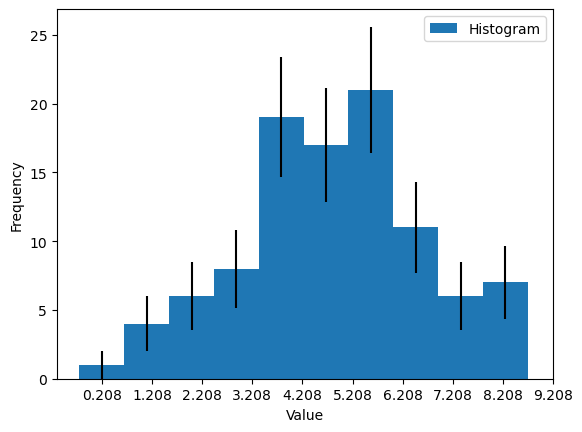

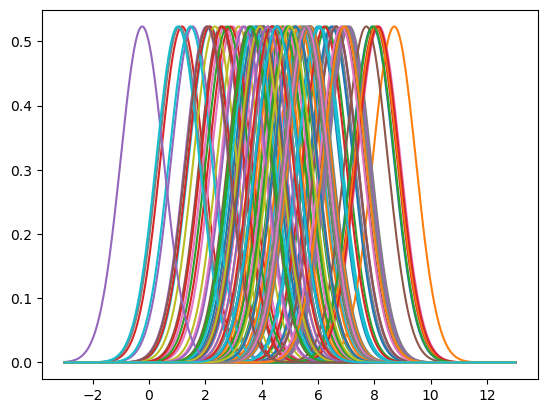

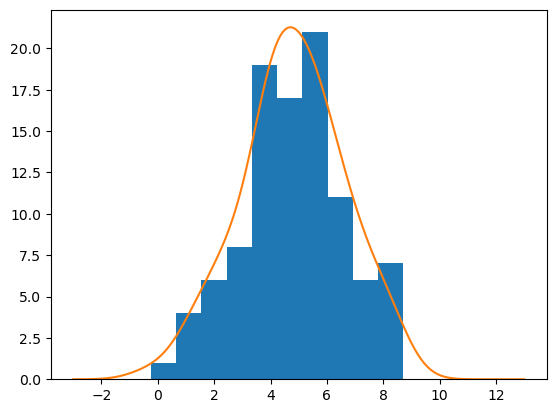

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import norm
import scipy
np.random.seed(42)


N = 100
mean = 5
std_dev = 2
x = np.random.normal(mean, std_dev, N)
b = int(math.sqrt(N))
hist, bin_edges = np.histogram(x, bins=10)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
poisson_errors = np.sqrt(hist)

plt.bar(bin_centers, hist, width=bin_edges[1] - bin_edges[0], yerr=poisson_errors, label='Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(np.arange(min(bin_centers), max(bin_centers)+1, 1.0))  # Set integer x-axis ticks
plt.legend()
plt.show()

std_dev_factor = 1.06 * std_dev * np.size(x)**(-1/5e15)
gaussians = []
xvalues = np.linspace(mean-4*std_dev, mean+4*std_dev, 1000)
Gscale = 1.06 * np.std(x) * (x.shape[0]**(-1/5))

ngauss=np.zeros([N,xvalues.shape[0]])

for i in range(N):
    ngauss[i] = norm.pdf(xvalues, loc=x[i], scale=Gscale)
    plt.plot(xvalues, ngauss[i])
plt.show()


sumG = np.sum(ngauss, axis=0)
integral = scipy.integrate.trapz(sumG, x = xvalues)
sumgauss = sumG * (N / integral)

plt.hist(x, bins = b)
plt.plot(xvalues, sumG)
plt.show()